In [3]:
import tensorflow as tf 
import tensorflow_datasets as tfds
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# already have split data into directories 
# add the paths 
train_data_dir = "data/train/"
test_data_dir = "data/test/"
val_data_dir = "data/val/"

batch_size = 32
img_height = 150
img_width = 150

# rescale instance
rescale = Rescaling(scale=1.0/255)

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width), batch_size=batch_size
)
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    image_size=(img_height, img_width), batch_size=batch_size
)
rescale = Rescaling(scale=1.0/255)
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_data_dir,
    seed=123,
    image_size=(img_height, img_width), batch_size=batch_size
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

Found 624 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [4]:
for images, labels in train_ds.take(1):  # Take one batch
    print("Train batch shape:", images.shape)  # Shape: (batch_size, height, width, channels)
    print("Train labels shape:", labels.shape)  # Shape: (batch_size,)


Train batch shape: (32, 150, 150, 3)
Train labels shape: (32,)


In [5]:
for images, labels in test_ds.take(1):
    print("Test batch shape:", images.shape)
    print("Test labels shape:", labels.shape)


Test batch shape: (32, 150, 150, 3)
Test labels shape: (32,)


Label for each of the above images: [1 1 1 1 1]


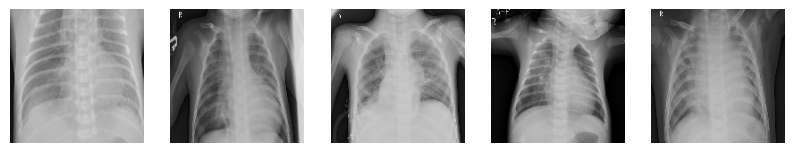

In [6]:
import matplotlib.pyplot as plt

# Get one batch of images and labels from the rescaled dataset
for images, labels in train_rescale_ds.take(1):  
    X_train_batch = images.numpy()  # Convert to NumPy array
    y_train_batch = labels.numpy()  # Convert labels to NumPy
    break

# Plot the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_batch[i])  # No need for uint8 conversion since values are [0,1]
    plt.axis("off")

print('Label for each of the above images:', y_train_batch[:5])

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

input_shape=(150, 150, 3)
num_classes = 2

model = keras.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Rescaling(1./255),
       
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
       
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
       
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),
       
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       7

In [14]:
# Train the model
history = model.fit(
    train_rescale_ds,
    validation_data=val_rescale_ds,
    epochs=20,  # Can be adjusted
    batch_size=32,
    verbose=1
)

Epoch 1/20
163/163 [==============================] - 52s 310ms/step - loss: 0.5857 - accuracy: 0.7410 - val_loss: 0.8762 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 50s 305ms/step - loss: 0.5793 - accuracy: 0.7429 - val_loss: 0.7958 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 50s 306ms/step - loss: 0.5798 - accuracy: 0.7429 - val_loss: 0.8684 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 50s 304ms/step - loss: 0.5766 - accuracy: 0.7429 - val_loss: 0.8574 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 50s 304ms/step - loss: 0.5742 - accuracy: 0.7429 - val_loss: 0.8610 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 50s 307ms/step - loss: 0.5746 - accuracy: 0.7429 - val_loss: 0.8699 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 51s 310ms/step - loss: 0.5740 - accuracy: 0.7429 - val_loss: 0.8684 - val_ac

In [15]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_rescale_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:}")


20/20 [==============================] - 2s 74ms/step - loss: 0.7100 - accuracy: 0.6250
Test Loss: 0.7100
Test Accuracy: 0.625


In [16]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()
    model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    
    # Tune the number of Conv2D layers and filters
    for i in range(hp.Int('conv_blocks', 1, 3)):
        filters = hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32)
        model.add(layers.Conv2D(filters, (3,3), activation='relu'))
        model.add(layers.MaxPooling2D())
    
    model.add(layers.Flatten())
    
    # Tune number of units in dense layer
    hp_units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    
    # Tune dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))
    
    model.add(layers.Dense(2, activation='softmax'))
    
    # Tune optimizer
    hp_learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [27]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    project_name='pneumonia_tuning'
)


stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(train_ds, validation_data=val_ds, epochs=10, callbacks=[stop_early])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
- Conv blocks: {best_hps.get('conv_blocks')}
- Filters (first block): {best_hps.get('filters_0')}
- Dense units: {best_hps.get('dense_units')}
- Dropout: {best_hps.get('dropout')}
- Optimizer: {best_hps.get('optimizer')}
- Learning rate: {best_hps.get('learning_rate')}
""")

Trial 30 Complete [00h 14m 19s]
val_accuracy: 0.9375

Best val_accuracy So Far: 1.0
Total elapsed time: 02h 42m 31s

Best hyperparameters:
- Conv blocks: 1
- Filters (first block): 128
- Dense units: 64
- Dropout: 0.2
- Optimizer: adam
- Learning rate: 0.0001



In [ ]:
# Bayesian Optimization tuner
bayesian_tuner = kt.BayesianOptimization(
    model_builder,
    objective='val_accuracy',
    max_trials=30,  # Limited to 30 trials for fair comparison
    num_initial_points=10,
    alpha=1e-4,
    beta=2.6,
    project_name='pneumonia_bayesian'
)

# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Run Bayesian search
bayesian_tuner.search(
    train_ds, 
    validation_data=val_ds, 
    epochs=10, 
    callbacks=[stop_early]
)

# Get best Bayesian hyperparameters
bayesian_best_hps = bayesian_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Random Search tuner
random_tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=30,  # Same number of trials for fair comparison
    project_name='pneumonia_random'
)

# Run Random search (using same early stopping)
random_tuner.search(
    train_ds, 
    validation_data=val_ds, 
    epochs=10, 
    callbacks=[stop_early]
)

# Get best Random hyperparameters
random_best_hps = random_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Print Bayesian Optimization results
print("Bayesian Optimization Best Hyperparameters:")
print(f"""
- Conv blocks: {bayesian_best_hps.get('conv_blocks')}
- Filters (first block): {bayesian_best_hps.get('filters_0')}
- Dense units: {bayesian_best_hps.get('dense_units')}
- Dropout: {bayesian_best_hps.get('dropout')}
- Optimizer: {bayesian_best_hps.get('optimizer')}
- Learning rate: {bayesian_best_hps.get('learning_rate')}
""")

# Print Random Search results
print("Random Search Best Hyperparameters:")
print(f"""
- Conv blocks: {random_best_hps.get('conv_blocks')}
- Filters (first block): {random_best_hps.get('filters_0')}
- Dense units: {random_best_hps.get('dense_units')}
- Dropout: {random_best_hps.get('dropout')}
- Optimizer: {random_best_hps.get('optimizer')}
- Learning rate: {random_best_hps.get('learning_rate')}
""")

# Compare validation accuracy
bayesian_best_model = bayesian_tuner.get_best_models(num_models=1)[0]
random_best_model = random_tuner.get_best_models(num_models=1)[0]

bayesian_val_acc = max([h.score for h in bayesian_tuner.oracle.get_best_trials(30)])
random_val_acc = max([h.score for h in random_tuner.oracle.get_best_trials(30)])

print(f"\nComparison of Best Validation Accuracy:")
print(f"Bayesian Optimization: {bayesian_val_acc:.4f}")
print(f"Random Search: {random_val_acc:.4f}")

In [29]:
model = model_builder(best_hps)

In [32]:
model.save('./models/best_pneumonia_model.keras')